#Regression Exercise    

Topics

*   Linear Regression
*   Ridge regression
*   Lasso regression
*   Elastice Net
*   Polynomial Regression


Evalutation
*  mean squared error (MSE)  
*  R^2 (coefficient of determination) regression score  






#Section 0 Warming up

##Setup

In [ ]:
import cv2
import numpy as np
import random
import pandas as pd
import io
from google.colab import files

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.style.use('classic')

# Fix random seeds so that the results will be reproducible
np.random.seed(1)
random.seed(1)

##Preparing datasets

###Load built-in datasets from [sklearn](http://scikit-learn.org/)   
*   [boston house-prices dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)
*   [diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)  


***Args:***   

*   ***DATA_FLAG***:  *flag to toggle datasets, e.g."boston", "diabetes",  (default: "diabetes")* 

In [ ]:
from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes

DATA_FLAG = "diabetes"                                                           # use the diabetes dataset as the default dataset

boston = load_boston()                                                           # The boston house-prices data consists of 506 samples, each has 13 features

diabetes = load_diabetes()                                                       # The diabetes data consists of 442 samples, each has 10 features

datasets = {}                                                                    # integrate all datasets into one variable

datasets['diabetes'] = {}                                                        # add diabetes dataset
datasets['diabetes']['X'], datasets['diabetes']['y'] = diabetes.data, diabetes.target
datasets['diabetes']['feature_names'] = diabetes['feature_names']
# datasets['diabetes']['data_filename'] = diabetes['data_filename']
# datasets['diabetes']['target_filename'] = diabetes['target_filename']

datasets['boston'] = {}                                                          # add boston dataset
datasets['boston']['X'], datasets['boston']['y'] = boston.data, boston.target
datasets['boston']['feature_names'] = boston['feature_names']
datasets['boston']['filename'] = boston['filename']

###Load external dataset
*   [forestfires.csv](https://www.dropbox.com/s/b9yq9u0bj8kjg0r/forestfires.csv?raw=1)    UCI machine learning dataset  


###Please DO NOT change the URLs below 

In [ ]:
###### Please DO NOT change the URLs below #####
url1 = "https://www.dropbox.com/s/b9yq9u0bj8kjg0r/forestfires.csv?raw=1"
urlgdp= 'https://raw.githubusercontent.com/killakalle/ageron_handson-ml/master/datasets/lifesat/gdp_per_capita.csv'
urloecd = 'https://raw.githubusercontent.com/killakalle/ageron_handson-ml/master/datasets/lifesat/oecd_bli_2015.csv'

df1 = pd.read_csv(url1)

gdp_per_capita = pd.read_csv(urlgdp, thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
life_sat = pd.read_csv(urloecd, thousands=',')
life_sat_total = life_sat[life_sat["INEQUALITY"]=="TOT"]
life_sat_total = life_sat_total.pivot(index="Country", columns="Indicator")

# common_ind = ([k for k, ind in enumerate(gdp_per_capita.index) if ind in list(life_sat_total.index)])
# gdp_life = gdp_per_capita.join(life_sat_total, on='Country', how='left', lsuffix='_left', rsuffix='_right')
gdp_per_capita.sort_index()   # important
_gdp_per_capita = (gdp_per_capita.loc[gdp_per_capita['Country'].isin(list(life_sat_total.index))])


datasets['forestfires'] = {}                                                     # add forestfires.csv dataset
datasets['forestfires']['X'] = np.hstack((np.array(df1['temp']).reshape(-1, 1),  
                                   np.array(df1['wind']).reshape(-1, 1)))
datasets['forestfires']['y'] = np.array(df1['area'])


datasets['gdp_life'] = {}                                                        # add gdp_life dataset
datasets['gdp_life']['X'] = np.array(_gdp_per_capita['GDP per capita'])
datasets['gdp_life']['y'] = np.array(life_sat_total.drop('OECD - Total', axis=0)['Value']['Life satisfaction'])

###Take a look at the loaded datasets by toggling the *DATA_FLAG*


*  diabetes dataset: 
  *  features:  'age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'
  *  number of samples:  442
  
  
*  boston dataset: 
  *  features:  'CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT'
  *  number of samples:  506

In [ ]:
import pandas as pd

DATA_FLAG = "boston"

df1 = pd.read_csv(datasets[DATA_FLAG]['filename'], skiprows=1)
# dataframe for boston house-prices dataset
print(df1.loc[:10])

X, y = datasets[DATA_FLAG]['X'], datasets[DATA_FLAG]['y']                        # load the default dataset with labels

print('# of samples in the boston dataset: ', len(X))                          # boston data has total 442 samples
print('boston features: ', datasets[DATA_FLAG]['feature_names'])               # diabetes data has 10 feature dimensionality  

DATA_FLAG = "diabetes"

X, y = datasets[DATA_FLAG]['X'], datasets[DATA_FLAG]['y']                        # load the default dataset with labels

print('# of samples in the diabetes dataset: ', len(X))                          # diabetes data has total 442 samples
print('diabetes features: ', datasets[DATA_FLAG]['feature_names'])               # diabetes data has 10 feature dimensionality  



       CRIM    ZN  INDUS  CHAS    NOX  ...  TAX  PTRATIO       B  LSTAT  MEDV
0   0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98  24.0
1   0.02731   0.0   7.07     0  0.469  ...  242     17.8  396.90   9.14  21.6
2   0.02729   0.0   7.07     0  0.469  ...  242     17.8  392.83   4.03  34.7
3   0.03237   0.0   2.18     0  0.458  ...  222     18.7  394.63   2.94  33.4
4   0.06905   0.0   2.18     0  0.458  ...  222     18.7  396.90   5.33  36.2
5   0.02985   0.0   2.18     0  0.458  ...  222     18.7  394.12   5.21  28.7
6   0.08829  12.5   7.87     0  0.524  ...  311     15.2  395.60  12.43  22.9
7   0.14455  12.5   7.87     0  0.524  ...  311     15.2  396.90  19.15  27.1
8   0.21124  12.5   7.87     0  0.524  ...  311     15.2  386.63  29.93  16.5
9   0.17004  12.5   7.87     0  0.524  ...  311     15.2  386.71  17.10  18.9
10  0.22489  12.5   7.87     0  0.524  ...  311     15.2  392.52  20.45  15.0

[11 rows x 14 columns]
# of samples in the boston dataset:  506

##Simple Linear  Model for Life Satisfaction   (w/o learning)     
 ***Args:***   

*   ***theta_0:***  *intercept. (default: 8.0)*      
*   ***theta_1:***  *coefficients. (default: -5e-5)*      

** *Output:*  **  
![alt text](https://www.dropbox.com/s/fj9ckd0aqht9dt1/Linear%20Model%20for%20Life%20Satisfaction%281%29.png?raw=1)


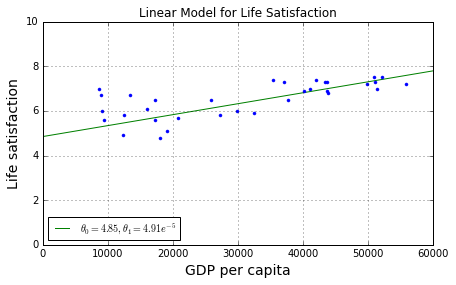

In [ ]:
DATA_FLAG = "gdp_life"
X = datasets[DATA_FLAG]['X']
y = datasets[DATA_FLAG]['y']       


theta_0 = 4.85
theta_1 = 4.91e-5

thetas = np.array([[theta_0], [theta_1]])
X_new = np.array([[0], [60000]])
X_new_b = np.c_[np.ones((2,1)),X_new] #with bias 
y_hat = np.matmul(X_new_b, thetas)


plt.figure(figsize=(7,4), facecolor='w')
plt.plot(X_new, y_hat, "g-", label=r'$\theta_0=4.85, \theta_1=4.91e^{-5}$')
plt.legend(loc="lower left", fontsize=10)
plt.plot(X, y, "b.")
plt.axis([0, 60000, 0, 10])
plt.xlabel("GDP per capita", fontsize=14)
plt.ylabel("Life satisfaction", fontsize=14)
plt.title("Linear Model for Life Satisfaction")
plt.grid(None)

#Change the values for theta_0 and theta_1 and see what happends 

# Section 1 - Regression Models

##1.1 - Linear Regression (Ordinary Least Squares)

###Learn a Linear Regression model for  [diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)  
 ***Args:***   

*   ***DATA_FLAG***:   *flag to toggle datasets, e.g."boston", "diabetes", "forestfires"  (default: "diabetes")*    
*   ***normalize***: *If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the L2-norm. (default False)*


***Output:***   
* *Mean squared error: 2548.07*  
* *R^2 regression score: 0.47*

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

DATA_FLAG = "diabetes"
X, y = datasets[DATA_FLAG]['X'], datasets[DATA_FLAG]['y'] 

indices = (2, )                                                                  # use only the third feature

X_train, X_test = X[:-20, indices], X[-20:, indices]                             # train/test split
y_train,  y_test = y[:-20], y[-20:]

normalize=False

ols = LinearRegression(normalize=normalize)                                      # Create linear regression object
ols.fit(X_train, y_train)                                                        # Train the model using the training sets
y_pred = ols.predict(X_test)                                                     # Make predictions using the testing set

### evaluation ###
print("Mean squared error: %.2f"                                                 # The mean squared error
      % mean_squared_error(y_test, y_pred))

print('R^2 regression score: %.2f' % r2_score(y_test, y_pred))                   # Explained R^2 score: 1 is perfect prediction

Mean squared error: 2548.07
R^2 regression score: 0.47


###Plot the Linear Regression curve for diabetes data using only Body mass index feature
** *Output:* **     
![alt text](https://www.dropbox.com/s/21wiujdsxk2lvbd/ols_diabetes.png?raw=1)

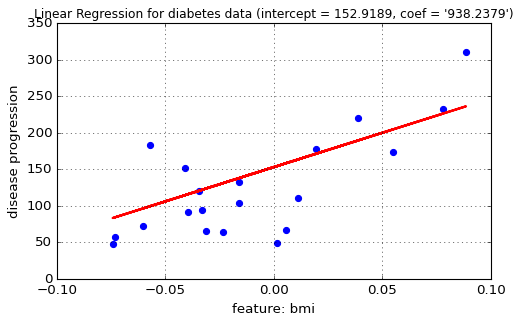

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.style.use('classic')

plt.figure(figsize=(7,4), facecolor='w')
plt.scatter(X_test, y_test, s=30, color='blue')                                  # Plot outputs
plt.plot(X_test, y_pred, color='red', linewidth=2)

plt.xlabel("feature: %s" % (datasets[DATA_FLAG]['feature_names'][2]))
plt.ylabel('disease progression')

plt.grid(None)
plt.title("Linear Regression for diabetes data (intercept = %.4f, coef = '%.4f')"
          % (ols.intercept_, ols.coef_) , fontsize=11)

plt.savefig('ols_diabetes.png')
# plt.title("Linear Regression for diabetes data using only %s feature (intercept = %.4f, coef = '%.4f')"
#           % (datasets[DATA_FLAG]['feature_names'][2], ols.intercept_, ols.coef_))

##1.2 - Ridge Regression   (Tikhonov regularization)
 


###Ordinary Least Squares and Ridge Regression Variance   for  [diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)  
  
***Code credits: [scikit learn: Ridge Regression](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols_ridge_variance.html)   ***    
 ***Args:***   

*   ***DATA_FLAG***:   *flag to toggle datasets, e.g."boston", "diabetes", "forestfires"  (default: "diabetes")*     
*   ***normalize***: *If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the L2-norm. (default False)*  
*   ***alpha:***   *Regularization strength; must be a positive float (default =0.1)*    

***Output:***   

![alt text](https://www.dropbox.com/s/4v4rpejcrh2q5oa/Linear%20Regression%20for%20Noise.png?raw=1)  

![alt text](https://www.dropbox.com/s/s0zen49aiqm65fq/Ridge%20Robustness%20to%20Noise.png?raw=1)

In [ ]:
from sklearn import linear_model

alpha = 0.1
normalize=False

DATA_FLAG = "diabetes"
X, y = datasets[DATA_FLAG]['X'], datasets[DATA_FLAG]['y'] 

X_train, y_train = X[-20:, np.newaxis, 2],  y[-20:]

linear_models = dict(ordinary_least_squares=linear_model.LinearRegression(normalize=normalize),          # create two regression models 
                     ridge_regression=linear_model.Ridge(alpha=.1, normalize=normalize))                 # one for ordinary least squares, one for ridge regression

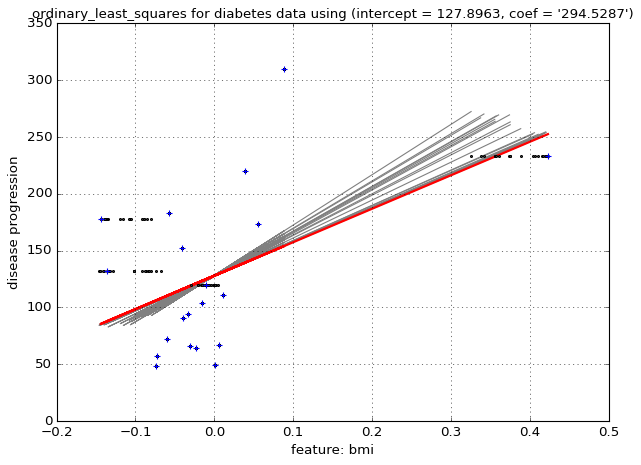

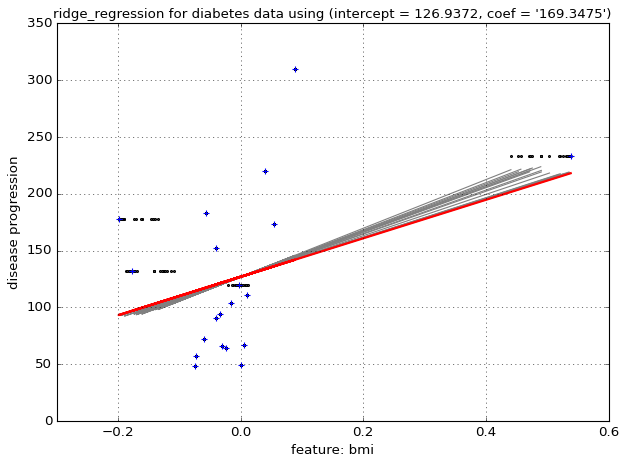

In [ ]:
indices = [0, 4, 15, 17]

for name, model in linear_models.items():
  fig, ax = plt.subplots(facecolor='w')
  for seed in range(20):                                                         # run total 20 predictions
      np.random.seed(seed)                                                       # Fix random seeds so that the results will be reproducible  
      
      this_X = X_train
      this_X[indices] += .01 * np.random.normal(size=(len(indices), 1))
      model.fit(this_X, y_train)                                                 # fit the regression model with noisy data

      ax.plot(this_X, model.predict(this_X), color='gray')
      ax.scatter(this_X, y_train, s=3, c='gray', marker='o', zorder=10)

  model.fit(X_train, y_train)
  ax.plot(X_train, model.predict(X_train), linewidth=2, color='red')
  ax.scatter(X_train, y_train, s=30, c='blue', marker='+', zorder=10)

  ax.set_title(name)
  ax.set_xlabel("feature: %s" % (datasets[DATA_FLAG]['feature_names'][2]))
  ax.set_ylabel('disease progression')
 
  fig.tight_layout()
  
  plt.grid(None)
  plt.title("%s for diabetes data using (intercept = %.4f, coef = '%.4f')"
          % (name,  model.intercept_, model.coef_), fontsize=12)
#   plt.title("%s for diabetes data using only %s feature (intercept = %.4f, coef = '%.4f')"
#           % (name, datasets[DATA_FLAG]['feature_names'][2], model.intercept_, ols.coef_))


##1.3 -  LASSO regression   
  

###Lasso  regression on  sin(x) function with noise    
[code reference](https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/)     



####define the LASSO regression function

In [ ]:
from sklearn.linear_model import Lasso

def lasso_regression(data, predictors, alpha, models_to_plot={}):                # define the regression function
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)                   # fit the model
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.xlabel(r'$x$')
        plt.ylabel(r'$y$', rotation=0)
        plt.title(r"$L_1$ term ($\gamma$)"+': %.3g'%alpha)
        plt.grid(None)
        
    rss = sum((y_pred-data['y'])**2)                                             #Return the result in pre-defined format
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

####generate sin(x)-like function and expand to multi-dimension

In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10
np.random.seed(10)                                                               # setting seed for reproducability

x = np.array([i*np.pi/180 for i in range(60,300,4)])                             # define input array with angles from 60deg to 300deg converted to radians
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
# plt.plot(data['x'],data['y'],'.')
# plt.grid(None)
for i in range(2,16):                                                            # power of 1 is already there
    colname = 'x_%d'%i                                                           # new var will be x_power
    data[colname] = data['x']**i
print(data.head())

          x         y       x_2  ...       x_13       x_14       x_15
0  1.047198  1.065763  1.096623  ...   1.821260   1.907219   1.997235
1  1.117011  1.006086  1.247713  ...   4.214494   4.707635   5.258479
2  1.186824  0.695374  1.408551  ...   9.268760  11.000386  13.055521
3  1.256637  0.949799  1.579137  ...  19.486248  24.487142  30.771450
4  1.326450  1.063496  1.759470  ...  39.353420  52.200353  69.241170

[5 rows x 16 columns]


####LASSO regression and plot for different penalization values  and sparse coefficients


 ** *Args:* **   
 
*   ** *alpha_lasso: * **  *list fo constants that multiply the L1 term. (defaults = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10])*          
*   ** *models_to_plot: * **  *dictionary of alpha values used for plotting. (defaults ={1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}*          


** *Output:* **   

![alt text](https://www.dropbox.com/s/njnu72h03ldej7d/Lasso%20Regularization.png?raw=1)  

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.47835738259036853, tolerance: 0.00369480384218441
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4782818399057239, tolerance: 0.00369480384218441
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.47079330190410706, tolerance: 0.00369480384218441
  positive)


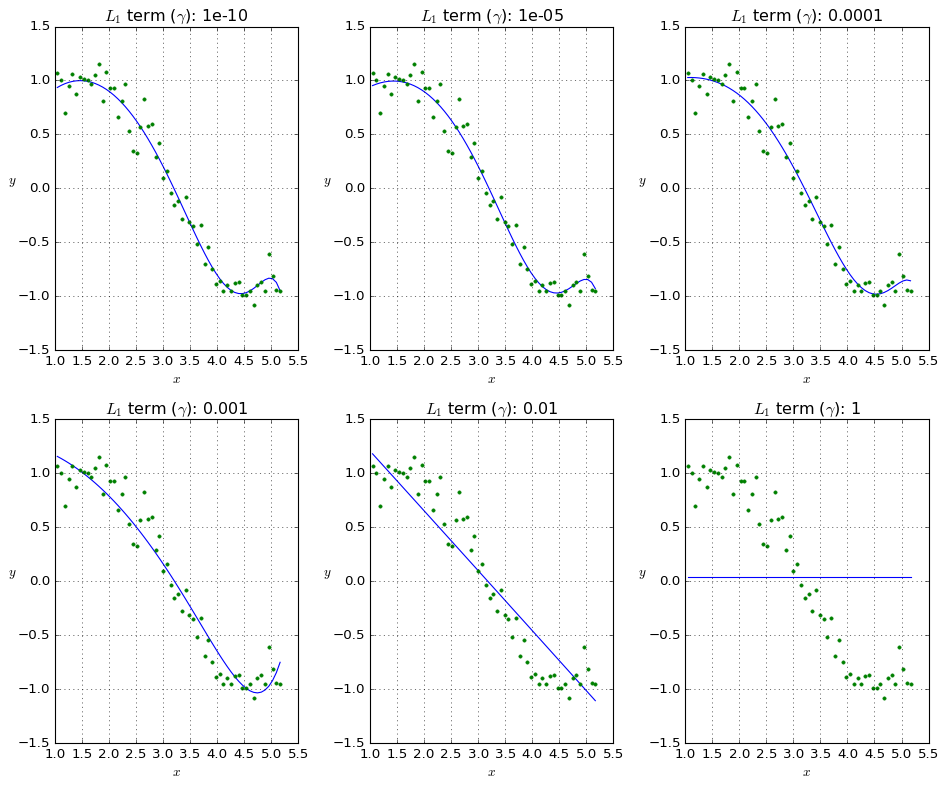

In [ ]:
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])                               # initialize predictors to all 15 powers of x

alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]               # define the alpha values to test
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]                 # initialize the dataframe to store coefficients
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)
fh = plt.figure(facecolor='w')
for i in range(10):                                                              # iterate over the alpha values
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)


####print out the  learned sparse coefficients   

In [ ]:
print(coef_matrix_lasso)

                   rss intercept  ...    coef_x_14    coef_x_15
alpha_1e-15   0.956715  0.222238  ...  -1.9545e-10 -9.23654e-11
alpha_1e-10   0.956715  0.222239  ... -1.95439e-10 -9.23689e-11
alpha_1e-08   0.956708  0.222374  ... -1.94185e-10  -9.2727e-11
alpha_1e-05   0.961296   0.50422  ...           -0 -6.95047e-11
alpha_0.0001   1.03263  0.903041  ...           -0 -4.40439e-11
alpha_0.001    1.67883   1.29462  ...            0            0
alpha_0.01     3.63907   1.75938  ...            0            0
alpha_1         36.948  0.038032  ...           -0           -0
alpha_5         36.948  0.038032  ...           -0           -0
alpha_10        36.948  0.038032  ...           -0           -0

[10 rows x 17 columns]


##1.4 - Elastic Net

###1.4.1   Elastic Net  for  Sparse Signals  
***Code credits: [scikit learn: Elestic Net example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_and_elasticnet.html)   ***     
 ** *Args:* **   


*   ** *normalize*:** *If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the L2-norm. (default False)*  
*   ** *alpha_L1: * **  *Constant that multiplies the L1 term. (defaults = 1.0)*   
*   ** *alpha: * **  *Constant that multiplies the penalty terms. (defaults = 1.0)*   
*   ** *l1_ratio: * **  *The ElasticNet mixing parameter.  For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2 .*    

** *Output:* **    

*   ***r^2 of LASSO on test data : 0.385982***   

*   ***r^2 of Elestic Net on test data : 0.240498***

####generate multi-dimensional random samples and sparsify coefficients 

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.metrics import r2_score

np.random.seed(42)                                                               # Generate sparse data to play with

n_samples, n_features = 50, 200                    
X = np.random.randn(n_samples, n_features)                                       # generate 50 samples     

coef = 3 * np.random.randn(n_features)                                           # generate 200-dimensinal coefficients

inds = np.arange(n_features)
np.random.shuffle(inds)
coef[inds[10:]] = 0                                                              ### sparsify coef

y = np.dot(X, coef)
y += 0.01 * np.random.normal(size=n_samples)                                     # add noise

X_train, y_train = X[:n_samples // 2], y[:n_samples // 2]                        # Split data in train set and test set
X_test, y_test = X[n_samples // 2:], y[n_samples // 2:]

####construct LASSO and ElasticNet model

In [ ]:
alpha_L1 = .1
alpha = 0.1
l1_ratio=0.7

lasso = Lasso(alpha=alpha_L1)                                                    # construct a Lasso regression model

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 of lasso on test data : %f" % r2_score_lasso)

enet = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)                                     # construct a ElasticNet regression model

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 of elestic net on test data : %f" % r2_score_enet)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
r^2 of lasso on test data : 0.385982
ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 of elestic net on test data : 0.240498


####plot for coefficients of ElasticNet and Lasso regression on sparse signals


** *Output:* **   

![alt text](https://www.dropbox.com/s/1aozgc4aezu96er/ElasticNet.png?dl=1)

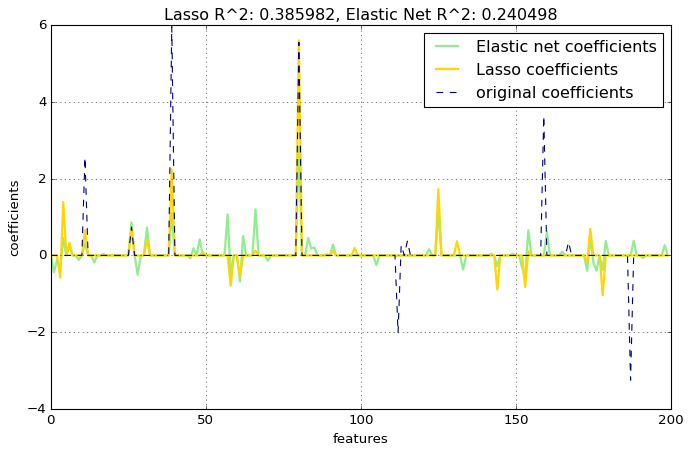

In [ ]:
plt.figure(figsize=(10,6), facecolor='w')
plt.plot(enet.coef_, color='lightgreen', linewidth=2,
         label='Elastic net coefficients')
plt.plot(lasso.coef_, color='gold', linewidth=2,
         label='Lasso coefficients')
plt.plot(coef, '--', color='navy', label='original coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f, Elastic Net R^2: %f"
          % (r2_score_lasso, r2_score_enet))
plt.xlabel("features")
plt.ylabel('coefficients')
plt.grid(None)

plt.savefig('ElasticNet.png')
# files.download('ElasticNet.png')

##1.5 - Polynomial regression


###Polynomial Regression for for function: y = xsin(x)
***Code credits: [scikit learn: Polynomial regression:](https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html)***      

** *Args:* **   

*   ** *degree_list: * **  *The list of degrees of the polynomial features. (default: [3, 4, 5])*   
  

** *Output:* **     
![alt text](https://www.dropbox.com/s/audyumgopisxok9/polynomials%20regression.png?raw=1)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)

x_plot = np.linspace(0, 10, 100)                                                # generate points used to plot

x = np.linspace(0, 10, 100)                                                     # generate points and keep a subset of them
rng = np.random.RandomState(1)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)


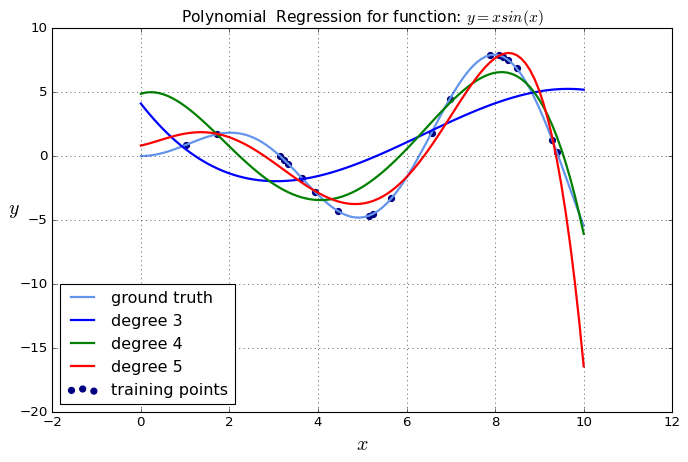

In [ ]:
X = x[:, np.newaxis]                                                            # create matrix versions of these arrays
X_plot = x_plot[:, np.newaxis]
# colors = ['teal', 'yellowgreen', 'gold']
degree_list = [3, 4, 5, ]

plt.figure(figsize=(10,6), facecolor='w')
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=2,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate(degree_list):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot,  linewidth=2,
             label="degree %d" % degree)

plt.legend(loc='lower left')
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$y$', rotation=0, fontsize=18)
plt.title("Polynomial  Regression for function: "+r"$y = xsin(x)$", fontsize=14)
plt.grid(None)
plt.savefig("polynomials regression.png")

###polynomial regression for cos(x) function   -  Underfitting vs. Overfitting  
 ** *Args:* **   
 
*   ** *degrees: * **  *The list of degrees of the polynomial features. (defaults = [1, 4, 15])*        

** *Output:* **   

![alt text](https://www.dropbox.com/s/y972utpqfuynsf5/polynomial%20complexity.png?raw=1)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

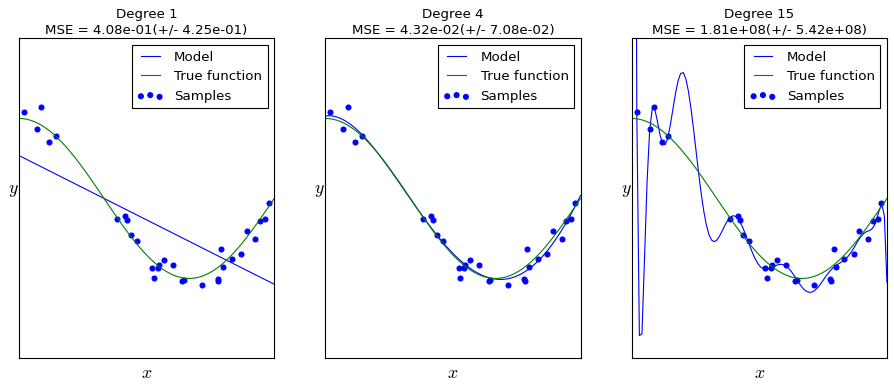

In [ ]:

plt.figure(figsize=(14, 5), facecolor='w')
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel(r"$x$",  fontsize=16)
    plt.ylabel(r"$y$", rotation=0,  fontsize=16)
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best", fontsize=12)
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()), fontsize=12)
plt.savefig("polynomial complexity.png")

##1.6 - [Theil-Sen Estimator](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TheilSenRegressor.html): robust multivariate regression model

<!-- [Theil-Sen Estimators in a Multiple Linear Regression Model, 2009 Xin Dang, Hanxiang Peng, Xueqin Wang and Heping Zhang](http://home.olemiss.edu/~xdang/papers/MTSE.pdf) -->



** *Args:* **   

*   ** *n_subsamples: * **  *Number of subsamples to calculate the parameters. This is at least the number of features (plus 1 if fit_intercept=True).If None, take the minimum number of subsamples leading to maximal robustness. (default: None)*   
*   ** *max_iter: * **  *Maximum number of iterations for the calculation of spatial median. (default:  300)*      
*   ** *tol: * **  *Tolerance when calculating spatial median. (default:  1.e-3)*   
  

** *Output:* **       
* *Mean squared error: 1954.66*  
* *R^2 regression score: 0.60*

In [ ]:
from sklearn.linear_model import TheilSenRegressor
from sklearn.metrics import mean_squared_error, r2_score
DATA_FLAG = "diabetes"
X, y = datasets[DATA_FLAG]['X'], datasets[DATA_FLAG]['y']    

X_train, X_test = X[:-20], X[-20:]                                                # train/test split
y_train,  y_test = y[:-20], y[-20:]

n_subsamples=None
max_iter=300
tol=1.e-3

tsreg = TheilSenRegressor(random_state=1)                                          # construct TheilSenRegressor regression model
tsreg.fit(X_train, y_train)                                                        # Train the model using the training sets
y_pred = tsreg.predict(X_test)                                                     # Make predictions using the testing set

### evaluation ###
print("Mean squared error: %.2f"                                                  # The mean squared error
      % mean_squared_error(y_test, y_pred))

print('R^2 regression score: %.2f' % r2_score(y_test, y_pred))                    # Explained R^2 score: 1 is perfect prediction300

Mean squared error: 2362.38
R^2 regression score: 0.51


In [ ]:
# Plot the fit for one feature
plt.scatter(X_test[:,2], y_test,  color='black')
plt.plot(X_test[:,2], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

###Computes a Theil-Sen Regression on a synthetic dataset    

** *Args:* **   

*   ** *n_samples: * **  *Number of samples. (default: 200)*   
*   ** *theta_1: * **  *coefficients. (default: 3.0)*   
*   ** *theta_0: * **  *intercept. (default: 2.0)*      

***Outputs:***  

![alt text](https://www.dropbox.com/s/amj4nk5a9grh25w/TheilSen_y.png?raw=1)  

![alt text](https://www.dropbox.com/s/rr1pdxcvx1pqxrf/TheilSen_X.png?raw=1)




In [ ]:
import time
from sklearn.linear_model import LinearRegression, TheilSenRegressor

estimators = [('OLS', LinearRegression()),
              ('Theil-Sen', TheilSenRegressor(random_state=42))]
colors = {'OLS': 'turquoise', 'Theil-Sen': 'gold'}
np.random.seed(0)                                                                # fix the random seed

n_samples = 200
theta_1 = 3.
theta_0 = 2.


noise = 0.1 * np.random.randn(n_samples)
x = np.random.randn(n_samples)
y = theta_1 * x + theta_0 + noise                                                # Linear model y = theta_1*x + N(theta_0, 0.1**2)

# 10% outliers only in the y direction
y[-int(n_samples*0.1):] += -20 * x[-int(n_samples*0.1):]
X = x[:, np.newaxis]

plt.figure(figsize=(7,4), facecolor='w')
plt.scatter(x, y, color='indigo', marker='x', s=40)
line_x = np.array([-theta_1, theta_1])
for name, estimator in estimators:
    t0 = time.time()
    estimator.fit(X, y)
    elapsed_time = time.time() - t0
    y_pred = estimator.predict(line_x.reshape(2, 1))
    plt.plot(line_x, y_pred, color=colors[name], linewidth=2,
             label='%s (fit time: %.2fs)' % (name, elapsed_time))

plt.axis('tight')
plt.legend(loc='upper left', fontsize=12)
plt.title("Corrupt y", fontsize=13)
plt.grid(None)
plt.xlabel(r"$x$", fontsize=16)
plt.ylabel(r"$y$", rotation=0, fontsize=16)
plt.savefig("TheilSen_y.png")
files.download("TheilSen_y.png")

noise = 0.1 * np.random.randn(n_samples)
x = np.random.randn(n_samples)
y = theta_1 * x + theta_0 + noise                                                # Linear model y = theta_1*x + N(theta_0, 0.1**2)

# 10% outliers in the X direction
x[-int(n_samples*0.1):] = 9.9
y[-int(n_samples*0.1):] += 22
X = x[:, np.newaxis]

plt.figure(figsize=(7,4),facecolor='w')
plt.scatter(x, y, color='indigo', marker='x', s=40)

line_x = np.array([-3, 10])
for name, estimator in estimators:
    t0 = time.time()
    estimator.fit(X, y)
    elapsed_time = time.time() - t0
    y_pred = estimator.predict(line_x.reshape(2, 1))
    plt.plot(line_x, y_pred, color=colors[name], linewidth=2,
             label='%s (fit time: %.2fs)' % (name, elapsed_time))

plt.axis('tight')
plt.legend(loc='upper left', fontsize=12)
plt.title("Corrupt x", fontsize=13)
plt.grid(None)
plt.xlabel(r"$x$", fontsize=16)
plt.ylabel(r"$y$", rotation=0, fontsize=16)
plt.savefig("TheilSen_X.png")
files.download("TheilSen_X.png")

#  Section 2 - Gradient Descent


##   Create Data     


###Generate some data with:   

** *Args:* **   

*   ** *n_samples: * **  *Number of samples. (default: 200)*    
*   ** *theta_0: * **  *intercept. (default: 4.0)*      
*   ** *theta_1: * **  *coefficients. (default: 3.0)*    

\begin{equation} \theta_0= 4 \end{equation}   
\begin{equation} \theta_1= 3  \end{equation}    

 

In [ ]:
# Fix random seeds so that the results will be reproducible
np.random.seed(1)
random.seed(1)

n_samples = 100
theta_0 = 4.0
theta_1 = 3.0

X = 2 * np.random.rand(n_samples, 1)
y = theta_0 + theta_1 * X + np.random.randn(n_samples, 1)                        # Add some Gaussian noise to the data  

###Plot the X and Y   
** *Output:* **   
![alt text](https://www.dropbox.com/s/4qtjeneksi8k0l9/GD_data.png?raw=1)

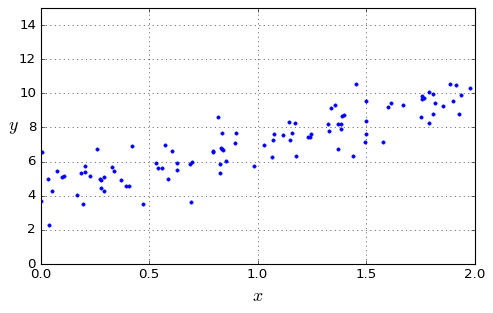

In [ ]:
plt.figure(figsize=(7,4), facecolor='w')
plt.plot(X,y,'b.')
plt.xlabel(r"$x$", fontsize=16)
plt.ylabel(r"$y$", rotation=0, fontsize=16)
_ =plt.axis([0,2,0,15])
plt.grid(None)

## Solving The Normal Equation    
###The Normal Equation as Below:   
\begin{equation} \hat{\theta}= (X^TX)^{-1}X^Ty  \end{equation}       

** *Output:* **    

*   ***4.23695725***   

*   ***2.84246254***   


###This is close to the true thetas 4 and 3. It cannot be accurate due to the noise introduced in data

In [ ]:
X_b = np.c_[np.ones((100,1)),X]
# theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_b.T,X_b)), X_b.T), y)
print(theta_best)

[[4.23695725]
 [2.84246254]]


In [ ]:
print(X_b.shape)
print(y.shape)
print(theta_best.shape)

(100, 2)
(100, 1)
(2, 1)


###plot prediction line with calculated theta    


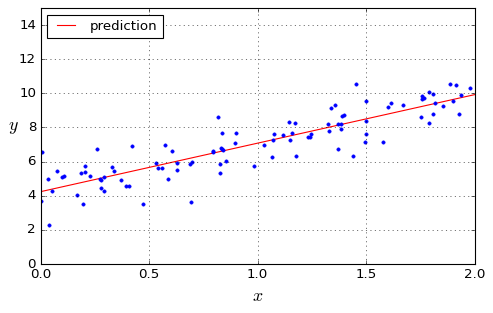

In [ ]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = np.matmul(X_new_b, theta_best)

plt.figure(figsize=(7,4), facecolor='w')
plt.plot(X_new,y_predict,'r-', label = "prediction")
plt.legend(loc='upper left', fontsize=12)
plt.plot(X,y,'b.')
plt.xlabel(r"$x$", fontsize=16)
plt.ylabel(r"$y$", rotation=0, fontsize=16)
plt.axis([0,2,0,15])
plt.grid(None)

##  Gradient Descent

### Cost Function & Gradients

The equation for calculating cost function and gradients are as shown below. Please note the cost function is for ***Linear regression***. For other algorithms the cost function will be different and the gradients would have  to be derived from the cost functions

<b>Cost</b>
\begin{equation}
J(\theta)=MSE(X, \theta) = \frac{1}{2N} \sum_{i=1}^{N} (\hat{y}_i - y_{i})^2 
\end{equation}



<b>Gradient</b>

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_p} = \frac{1}{N}\sum_{i=1}^{N}(\theta^{T}x_i - y_{i})x_p^{(i)}
\end{equation}

###define a function to calculate the cost for given X and Y. The following shows and example of a single dimensional X
    

In [ ]:
def  cal_cost(theta,X,y):
    '''    
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = np.matmul(X, theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

###define the gradient descent function 

In [ ]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.matmul(X, theta)
        
        theta = theta -(1/m)*learning_rate*( np.matmul(X.T, (prediction - y)) )
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

###start with 1000 iterations and a learning rate of 0.01. Start with theta from a Gaussian distribution


 ** *Args:* **   
 
*   ** *lr: * **  *The learning rate. (defaults = 0.01)*   
*   ** *n_iter: * **  *number of iterations. (defaults = 1000)*     
*   ** *theta: * **  *initial vector of thetas . (default from a Gaussian distribution )*   


** *Output:* **    

*   ***Theta0:          4.278,***   

*   ***Theta1:          2.807***     
*   ***Final cost/MSE:  4001.171***   




In [ ]:
# Fix random seeds so that the results will be reproducible
np.random.seed(1)
random.seed(1)

lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.278,
Theta1:          2.807
Final cost/MSE:  4001.171


###plot the cost history over iterations    

** *Output:* **     
![alt text](https://www.dropbox.com/s/ppw0j2xk5xvidtx/GD_1000.png?raw=1)

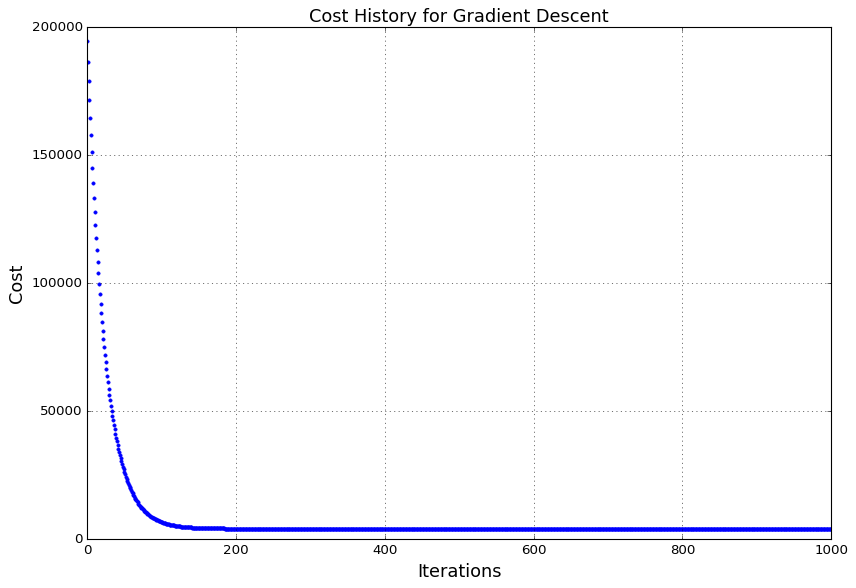

In [ ]:
fig,ax = plt.subplots(figsize=(12,8), facecolor='w')

ax.set_ylabel('Cost', fontsize=16)
ax.set_xlabel('Iterations', fontsize=16)
_=ax.plot(range(n_iter),cost_history,'b.')
plt.title("Cost History for Gradient Descent", fontsize=16)
plt.grid(None)



###zoom in till iteration the first 200 and see the curve   
** *Output:* **      
![alt text](https://www.dropbox.com/s/ea2ao6eqnmq4nfd/GD_200.png?raw=1)   


###It is worth while to note that the cost drops faster initially and then the gain in cost reduction is not as much

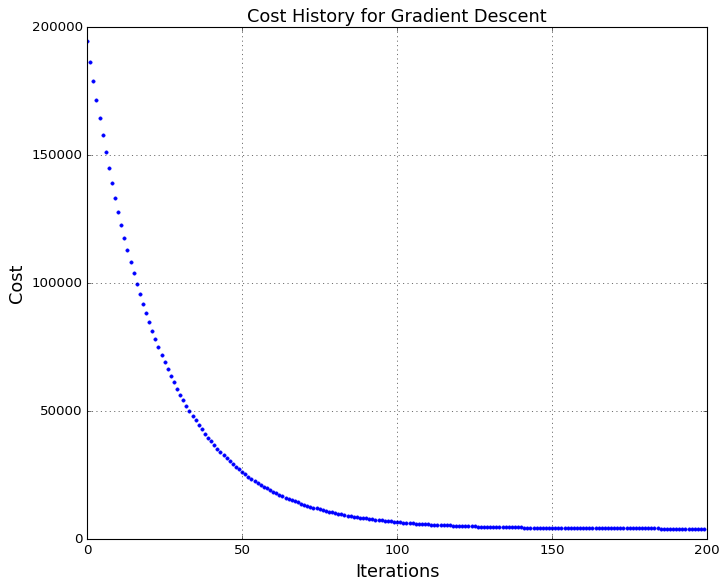

In [ ]:
fig,ax = plt.subplots(figsize=(10,8), facecolor='w')
_=ax.plot(range(200),cost_history[:200],'b.')
ax.set_ylabel('Cost',  fontsize=16)
ax.set_xlabel('Iterations',  fontsize=16)
plt.title("Cost History for Gradient Descent",  fontsize=16)
plt.grid(None)

### define a function  showing  the effects together and also how gradient decent actually is working

In [ ]:
def plot_GD(n_iter,lr,ax,ax1=None):
     """
     n_iter = no of iterations
     lr = Learning Rate
     ax = Axis to plot the Gradient Descent
     ax1 = Axis to plot cost_history vs Iterations plot

     """
     _ = ax.plot(X,y,'b.')
     theta = np.random.randn(2,1)

     tr =0.1
     cost_history = np.zeros(n_iter)
     for i in range(n_iter):
        pred_prev = np.matmul(X_b, theta)
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = np.matmul(X_b, theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
     if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')  

### Plot the figures for different iterations and learning rates combination   

###The red lines show how the gradient descent starts and then slowly gets closer to the final value
** *Output:* **     
![alt text](https://www.dropbox.com/s/mb6ezfy4nqsu5om/GD_iter.png?raw=1)   



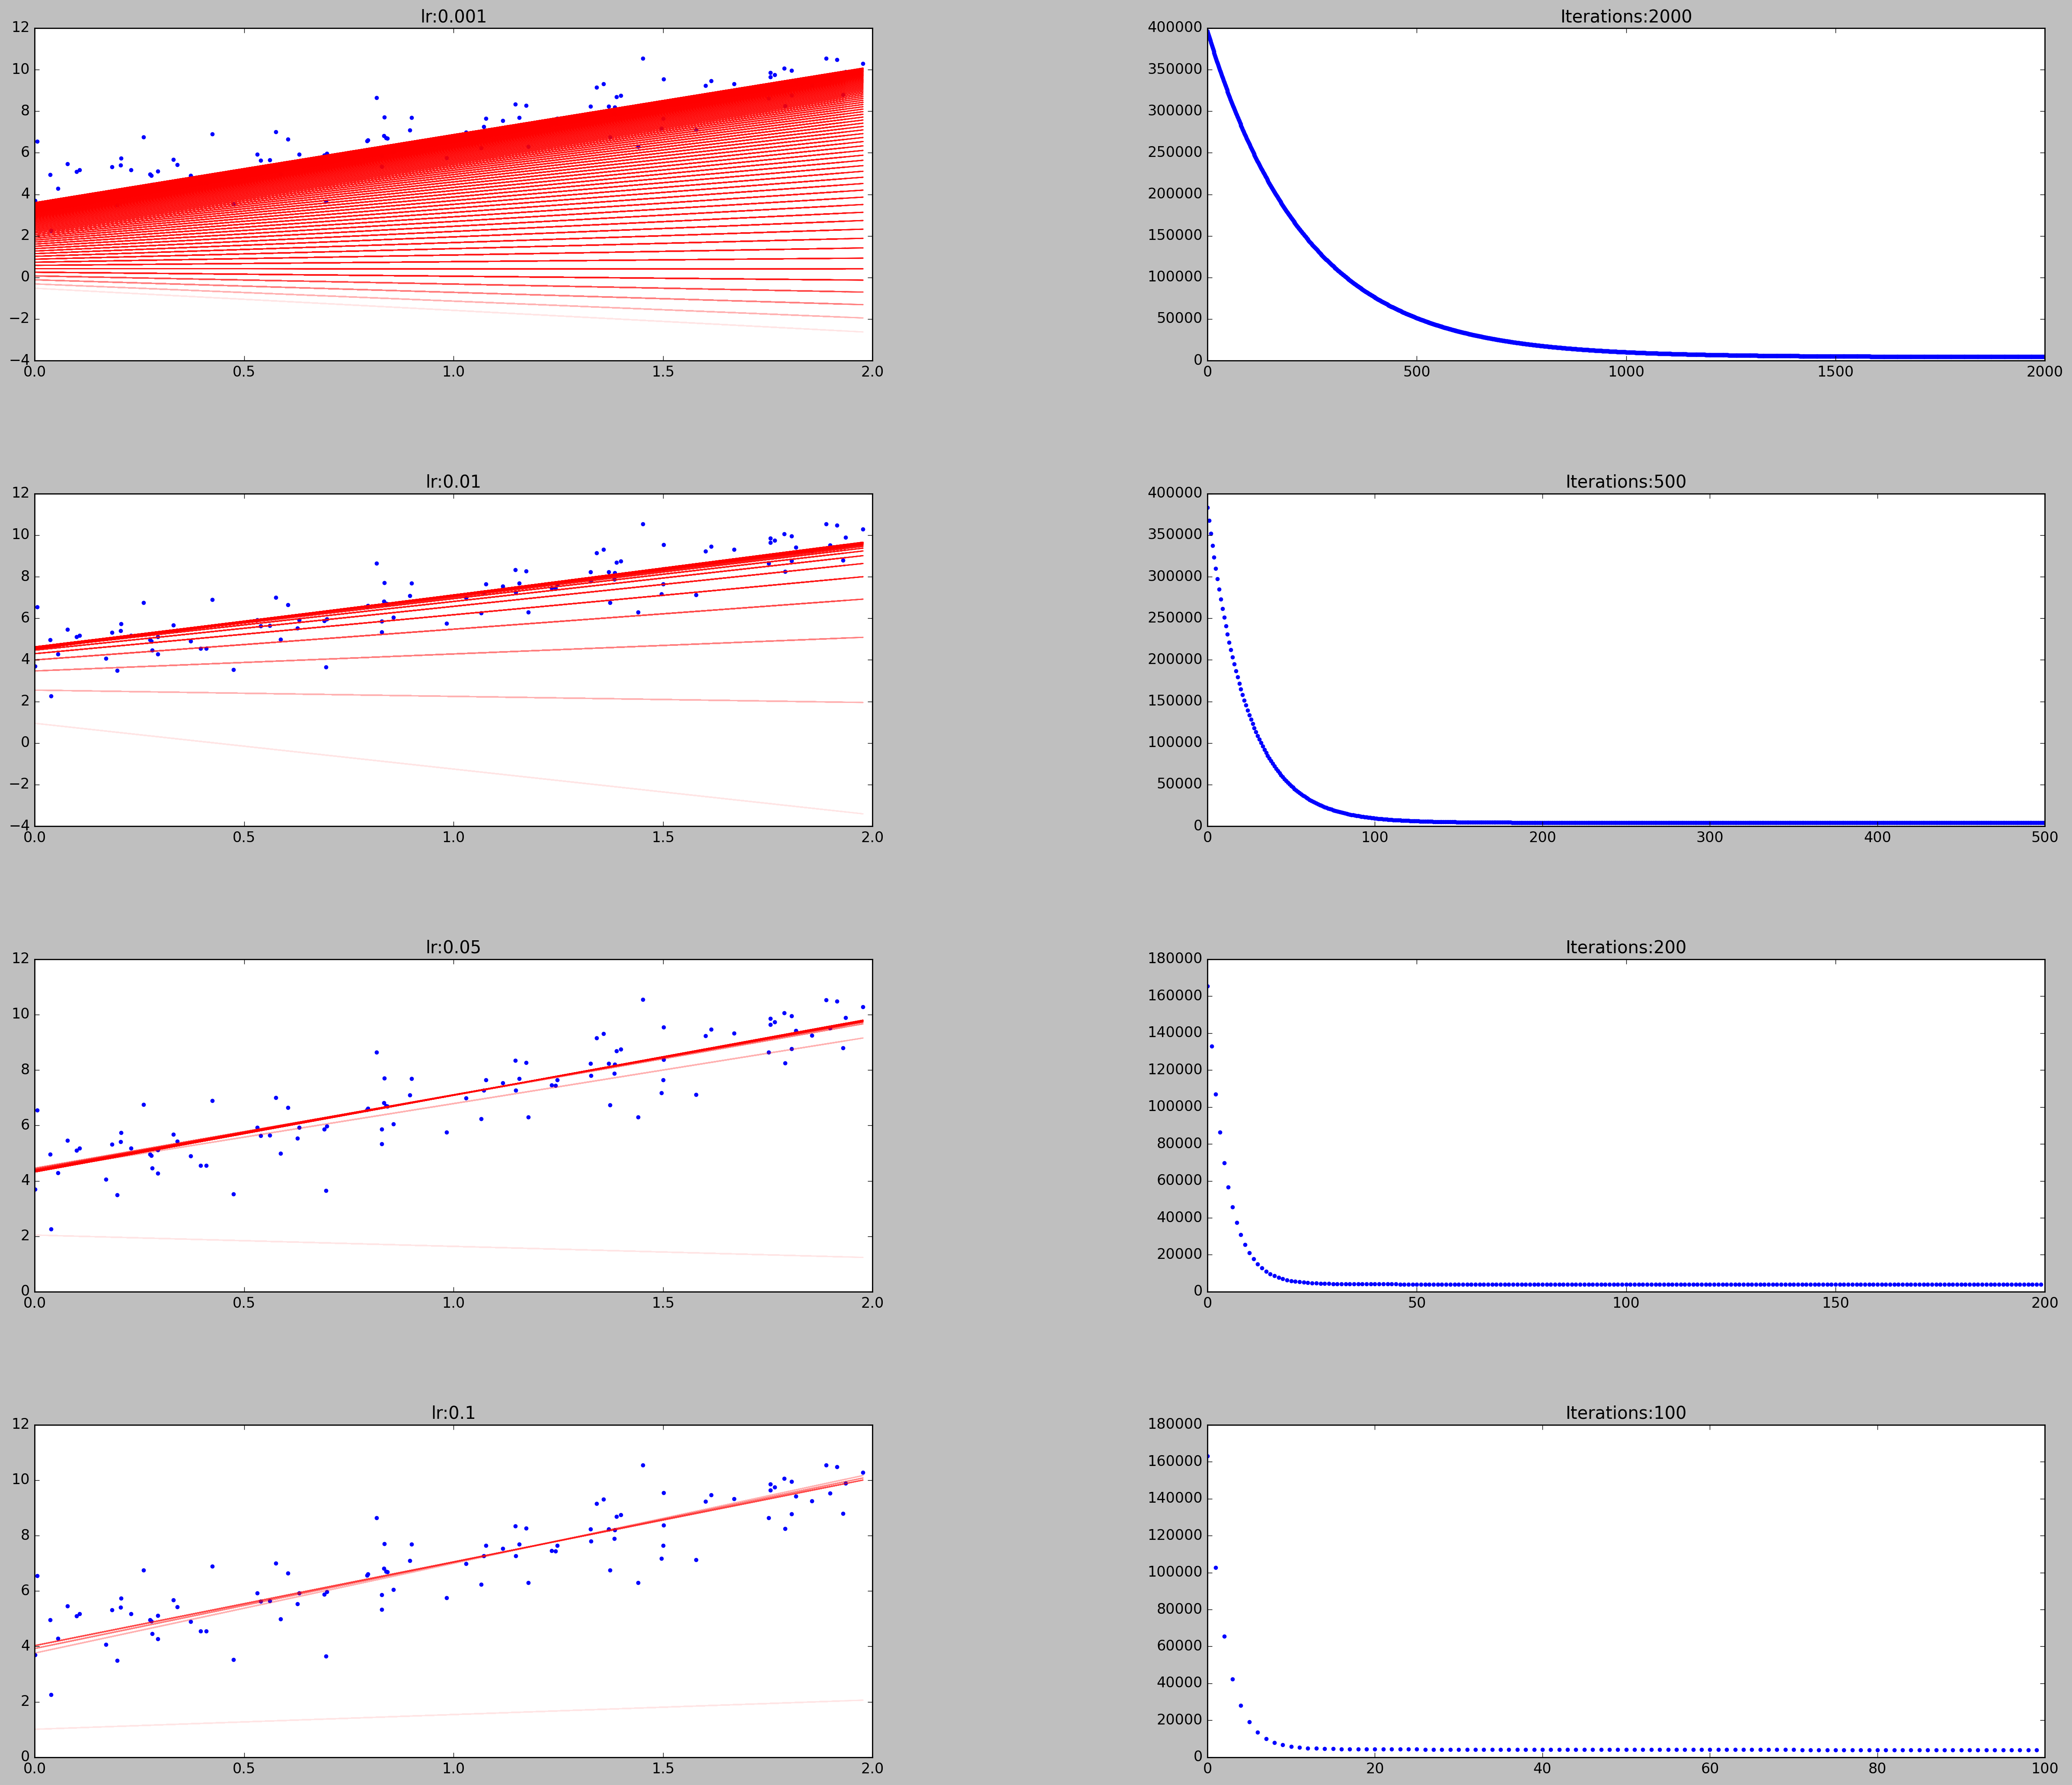

In [ ]:
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count, facecolor='w')
    count += 1
   
    ax1 = fig.add_subplot(4,2,count, facecolor='w')
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plt.grid(None)  
    plot_GD(n_iter,lr,ax,ax1)
    plt.grid(None)  
# plt.savefig("GD_iter.png")  
#     files.download("GD_iter.png") 

###Plot individual figure to zoom in



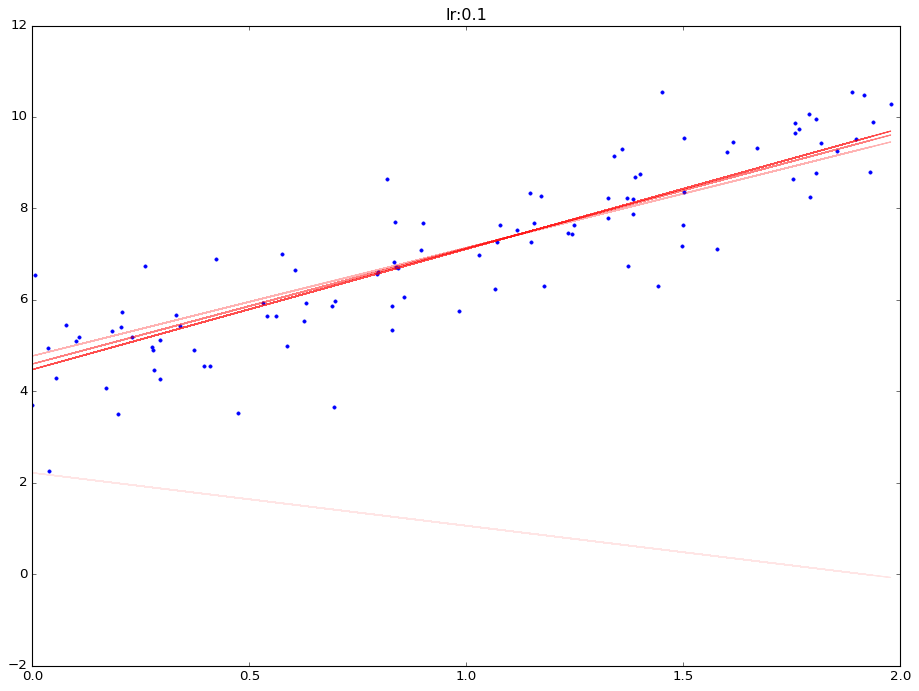

In [ ]:
lr = 0.1
epochs = 100
_,ax = plt.subplots(figsize=(14,10), facecolor='w')
ax.set_title("lr:{}".format(lr))
plot_GD(epochs,lr,ax)

## GD/SGD/Mini-Batch GD

** *Args:* **   

*   ** *solver: * **  *the solver to choose e.g. "SGD", "Mini-BatchGD", "GD". (default: "GD")*   
*   ** *n_iter: * **  *total number of iterations. (default:  300)*      
*   ** *lr: * **  *learning rate. (default:  1.e-3)*   

###Define the Gradient Descent function 

In [ ]:
def gradient_descent(X,y,theta,learning_rate=0.01,epochs=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    epochs = number of updates for all batches
    
    Returns the final theta vector and array of cost history over no of epochs
    '''
    m = len(y)
    cost_history = np.zeros(epochs)
    theta_history = np.zeros((epochs,2))
    for epoch in range(epochs):
        
        prediction = np.matmul(X,theta)
        
        theta = theta -(1/m)*learning_rate*( np.matmul(X.T, (prediction - y)) )
        theta_history[epoch,:] =theta.T
        cost_history[epoch]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

### Defien the Stochastic Gradient Descent function

In [ ]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,epochs=10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    epochs = number of updates for all batches
    
    Returns the final theta vector and array of cost history over no of epochs
    '''
    m = len(y)
    cost_history = np.zeros(epochs)
    
    rand_ind_list = np.arange(m)
    np.random.shuffle(rand_ind_list)
    
    for epoch in range(epochs):
        cost =0.0
#         for i in range(m):
        for rand_ind in rand_ind_list:
#             rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.matmul(X_i,theta)

            theta = theta -(1/m)*learning_rate*( np.matmul(X_i.T, (prediction - y_i)) )
            cost += cal_cost(theta,X_i,y_i)
        cost_history[epoch]  = cost
  
    return theta, cost_history

### Define the Mini-Batch Gradient Descent    

In [ ]:
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,epochs=10,batch_size =20):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    epochs = number of updates for all batches
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(epochs)
    n_batches = int(m/batch_size)
    
    for epoch in range(epochs):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
         
            prediction = np.matmul(X_i,theta)

            theta = theta -(1/m)*learning_rate*(np.matmul(X_i.T, (prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[epoch]  = cost
        
    return theta, cost_history

### Define a function to plot for GD/SGD/Mini-Batch GD

In [ ]:
def plot_GD(epochs,lr,solver, ax,ax1=None):
     """
     n_iter = no of iterations
     lr = Learning Rate
     ax = Axis to plot the Gradient Descent
     ax1 = Axis to plot cost_history vs Iterations plot
     
     """
     _ = ax.plot(X,y,'b.')
     theta = np.random.randn(2,1)

     tr =0.1
     cost_history = np.zeros(epochs)
     for i in range(epochs):
        pred_prev = X_b.dot(theta)
        if solver == "Mini-BatchGD":
          theta,h = minibatch_gradient_descent(X_b,y,theta,lr,1)
        elif solver == "SGD":
          theta,h = stocashtic_gradient_descent(X_b,y,theta,lr,1)
        elif solver == "GD":
          theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)
        
        cost_history[i] = h[0]

        if ((i % 25 == 0) ):      # for better visualization
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
     if not ax1== None:
        _ = ax1.plot(range(epochs),cost_history,'b.')  

***Args:***   

*   ***solver: ***  *the solver to choose e.g. "SGD", "Mini-BatchGD", "GD". (default: "GD")*   
*   ***epochs:***  *number of updates for all batches. (default:  200)*      
*   ***lr:***  *learning rate. (default:  1.e-1)*   

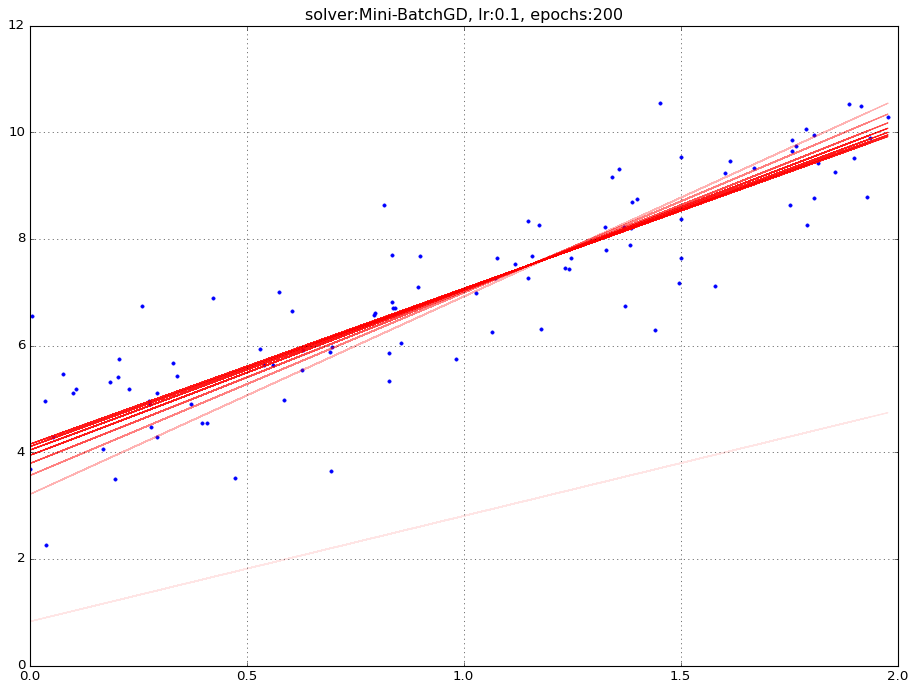

In [ ]:
_,ax = plt.subplots(figsize=(14,10), facecolor='w')
lr = 0.1
epochs = 200
solver = "Mini-BatchGD"
ax.set_title("solver:{}, lr:{}, epochs:{}".format(solver, lr, epochs))
plot_GD(epochs,lr,solver, ax)
plt.grid(None)